In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-03T23:15:42.203859+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

seaborn: 0.13.2
sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
teeplot: 1.4.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": 8,
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Alpha+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 3.0279159545898438e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.46271610260009766}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0039272308349609375}
!!! {"init_...": 0.0006608963012695312}
!!! {"ete3Tree": 0.6325094699859619}
!!! {"GenomeTree_hierarchical": 0.002764463424682617}
!!! {"mutateBranchETEhierarchy": 0.09075450897216797}
!!! {"write_genome_short": 0.04549884796142578}


  4%|▍         | 8/193 [00:03<00:52,  3.53it/s]

!!! {"writeGenomeNoIndels": 0.17003893852233887}
!!! {"pl.DataFrame": 0.04480934143066406}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.9962031841278076}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.017440319061279297}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032618045806884766}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012922286987304688}
!!! {"init_...": 0.00047135353088378906}
!!! {"ete3Tree": 7.700920104980469e-05}
!!! {"GenomeTree_hierarchical": 0.002135038375854492}
!!! {"mutateBranchETEhierarchy": 1.33514404296875e-05}
!!! {"write_genome_short": 8.1777572631835

  8%|▊         | 15/193 [00:03<00:23,  7.57it/s]

!!! {"phastSimRun": 9.799003601074219e-05}
!!! {"init_...": 0.0005478858947753906}
!!! {"ete3Tree": 0.0007848739624023438}
!!! {"GenomeTree_hierarchical": 0.0026531219482421875}
!!! {"mutateBranchETEhierarchy": 0.0001323223114013672}
!!! {"write_genome_short": 0.00013446807861328125}
!!! {"writeGenomeNoIndels": 0.0002391338348388672}
!!! {"pl.DataFrame": 0.00011920928955078125}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006728410720825195}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001957416534423828}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0029969215393066406}
enter log_context_duration for _

 13%|█▎        | 26/193 [00:03<00:11, 15.14it/s]

!!! {"ete3Tree": 0.019994497299194336}
!!! {"GenomeTree_hierarchical": 0.001977682113647461}
!!! {"mutateBranchETEhierarchy": 0.005103111267089844}
!!! {"write_genome_short": 0.002485990524291992}
!!! {"writeGenomeNoIndels": 0.007928609848022461}
!!! {"pl.DataFrame": 0.0015823841094970703}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04119062423706055}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0008575916290283203}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0029871463775634766}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010037422180175781}
!!! {"init_...": 0.00040721893

 21%|██        | 40/193 [00:03<00:05, 28.11it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0030832290649414062}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.465217590332031e-05}
!!! {"init_...": 0.0004360675811767578}
!!! {"ete3Tree": 5.7697296142578125e-05}
!!! {"GenomeTree_hierarchical": 0.0021016597747802734}
!!! {"mutateBranchETEhierarchy": 9.059906005859375e-06}
!!! {"write_genome_short": 6.389617919921875e-05}
!!! {"writeGenomeNoIndels": 6.198883056640625e-06}
!!! {"pl.DataFrame": 6.4849853515625e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004400968551635742}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001842

 27%|██▋       | 53/193 [00:03<00:03, 37.84it/s]

!!! {"writeGenomeNoIndels": 0.008725404739379883}
!!! {"pl.DataFrame": 0.001577138900756836}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04227590560913086}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0008795261383056641}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003306865692138672}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010633468627929688}
!!! {"init_...": 0.00041413307189941406}
!!! {"ete3Tree": 5.793571472167969e-05}
!!! {"GenomeTree_hierarchical": 0.0020987987518310547}
!!! {"mutateBranchETEhierarchy": 9.5367431640625e-06}
!!! {"write_genome_short": 6.4849853515

 35%|███▍      | 67/193 [00:04<00:02, 48.85it/s]

!!! {"init_...": 0.0008037090301513672}
!!! {"ete3Tree": 0.00030040740966796875}
!!! {"GenomeTree_hierarchical": 0.0020885467529296875}
!!! {"mutateBranchETEhierarchy": 8.344650268554688e-05}
!!! {"write_genome_short": 0.0002999305725097656}
!!! {"writeGenomeNoIndels": 0.0001671314239501953}
!!! {"pl.DataFrame": 0.00015234947204589844}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005599260330200195}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000209808349609375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003058910369873047}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.632110

 38%|███▊      | 74/193 [00:04<00:02, 52.52it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.2172927856445312e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032634735107421875}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.417533874511719e-05}
!!! {"init_...": 0.0004215240478515625}
!!! {"ete3Tree": 5.650520324707031e-05}
!!! {"GenomeTree_hierarchical": 0.0020904541015625}
!!! {"mutateBranchETEhierarchy": 8.58306884765625e-06}
!!! {"write_genome_short": 6.508827209472656e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 6.699562072753906e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004387617111206055}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000197649

 42%|████▏     | 81/193 [00:04<00:02, 46.67it/s]

!!! {"write_genome_short": 0.0013136863708496094}
!!! {"writeGenomeNoIndels": 0.0016331672668457031}
!!! {"pl.DataFrame": 0.0003554821014404297}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.012650489807128906}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00032520294189453125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
len(phylogeny_df)=22, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003023386001586914}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.632110595703125e-05}
!!! {"init_...": 0.0004401206970214844}
!!! {"ete3Tree": 0.00018644332885742188}
!!! {"GenomeTree_hierarchical": 0.002101898193359375}
!!! {"mutateBranchETEhierarchy": 3.43322

 48%|████▊     | 93/193 [00:04<00:02, 43.82it/s]

!!! {"write_genome_short": 0.0005574226379394531}
!!! {"writeGenomeNoIndels": 7.152557373046875e-06}
!!! {"pl.DataFrame": 6.818771362304688e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005498647689819336}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000171661376953125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0029556751251220703}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.560585021972656e-05}
!!! {"init_...": 0.0004012584686279297}
!!! {"ete3Tree": 5.626678466796875e-05}
!!! {"GenomeTree_hierarchical": 0.0020868778228759766}
!!! {"mutateBranchETEhierarchy": 9.0599060

 54%|█████▍    | 104/193 [00:04<00:01, 47.12it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003368377685546875}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010180473327636719}
!!! {"init_...": 0.00040268898010253906}
!!! {"ete3Tree": 6.413459777832031e-05}
!!! {"GenomeTree_hierarchical": 0.0026900768280029297}
!!! {"mutateBranchETEhierarchy": 1.0251998901367188e-05}
!!! {"write_genome_short": 6.842613220214844e-05}
!!! {"writeGenomeNoIndels": 8.821487426757812e-06}
!!! {"pl.DataFrame": 6.508827209472656e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005135297775268555}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00017714500427246094}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5735626220703125e-05}
len(phylogeny_df)=4, len(ancestral_sequence)=390
enter log_context_duration for alifestd_

 60%|██████    | 116/193 [00:05<00:01, 52.09it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003100156784057617}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.584426879882812e-05}
!!! {"init_...": 0.00043201446533203125}
!!! {"ete3Tree": 5.745887756347656e-05}
!!! {"GenomeTree_hierarchical": 0.0020856857299804688}
!!! {"mutateBranchETEhierarchy": 9.059906005859375e-06}
!!! {"write_genome_short": 6.4849853515625e-05}
!!! {"writeGenomeNoIndels": 5.9604644775390625e-06}
!!! {"pl.DataFrame": 6.461143493652344e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004379749298095703}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000188589

 66%|██████▋   | 128/193 [00:05<00:01, 55.06it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031669139862060547}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.655952453613281e-05}
!!! {"init_...": 0.0004000663757324219}
!!! {"ete3Tree": 6.437301635742188e-05}
!!! {"GenomeTree_hierarchical": 0.002117156982421875}
!!! {"mutateBranchETEhierarchy": 1.049041748046875e-05}
!!! {"write_genome_short": 8.20159912109375e-05}
!!! {"writeGenomeNoIndels": 9.775161743164062e-06}
!!! {"pl.DataFrame": 6.699562072753906e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00429987907409668}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000170707

 74%|███████▎  | 142/193 [00:05<00:00, 60.49it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033931732177734375}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.965896606445312e-05}
!!! {"init_...": 0.00040531158447265625}
!!! {"ete3Tree": 5.698204040527344e-05}
!!! {"GenomeTree_hierarchical": 0.0027925968170166016}
!!! {"mutateBranchETEhierarchy": 9.059906005859375e-06}
!!! {"write_genome_short": 0.00010013580322265625}
!!! {"writeGenomeNoIndels": 6.198883056640625e-06}
!!! {"pl.DataFrame": 6.628036499023438e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005476951599121094}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001709461212158203}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_a

 77%|███████▋  | 149/193 [00:05<00:00, 46.18it/s]

!!! {"write_genome_short": 0.0004413127899169922}
!!! {"writeGenomeNoIndels": 6.9141387939453125e-06}
!!! {"pl.DataFrame": 6.771087646484375e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004911899566650391}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001780986785888672}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0029981136322021484}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.679794311523438e-05}
!!! {"init_...": 0.00040078163146972656}
!!! {"ete3Tree": 5.5789947509765625e-05}
!!! {"GenomeTree_hierarchical": 0.002112865447998047}
!!! {"mutateBranchETEhierarchy": 9.05990

 80%|████████  | 155/193 [00:05<00:00, 46.67it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003153085708618164}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010442733764648438}
!!! {"init_...": 0.0004031658172607422}
!!! {"ete3Tree": 5.9604644775390625e-05}
!!! {"GenomeTree_hierarchical": 0.002149343490600586}
!!! {"mutateBranchETEhierarchy": 9.298324584960938e-06}
!!! {"write_genome_short": 7.128715515136719e-05}
!!! {"writeGenomeNoIndels": 6.198883056640625e-06}
!!! {"pl.DataFrame": 6.961822509765625e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004347801208496094}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000175

 83%|████████▎ | 161/193 [00:07<00:02, 12.73it/s]

!!! {"mutateBranchETEhierarchy": 0.04201364517211914}
!!! {"write_genome_short": 0.0223541259765625}
!!! {"writeGenomeNoIndels": 0.07164120674133301}
!!! {"pl.DataFrame": 0.012418270111083984}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.3196690082550049}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0059812068939208984}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0030922889709472656}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013446807861328125}
!!! {"init_...": 0.00047516822814941406}
!!! {"ete3Tree": 8.416175842285156e-05}
!!! {"GenomeTree_hierarchical": 0.00223922729492

 86%|████████▌ | 166/193 [00:07<00:01, 15.48it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.005985736846923828}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.72747802734375e-05}
!!! {"init_...": 0.00040602684020996094}
!!! {"ete3Tree": 0.008948326110839844}
!!! {"GenomeTree_hierarchical": 0.002019166946411133}
!!! {"mutateBranchETEhierarchy": 0.002061128616333008}
!!! {"write_genome_short": 0.0011360645294189453}
!!! {"writeGenomeNoIndels": 0.003461122512817383}
!!! {"pl.DataFrame": 0.0006725788116455078}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.020409345626831055}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004971027374267578}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=740, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_new

 92%|█████████▏| 178/193 [00:07<00:00, 22.65it/s]

!!! {"ete3Tree": 0.06093764305114746}
!!! {"GenomeTree_hierarchical": 0.002015352249145508}
!!! {"mutateBranchETEhierarchy": 0.015777587890625}
!!! {"write_genome_short": 0.007479429244995117}
!!! {"writeGenomeNoIndels": 0.02555680274963379}
!!! {"pl.DataFrame": 0.004731178283691406}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.11876082420349121}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0024132728576660156}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0030984878540039062}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013184547424316406}
!!! {"init_...": 0.00047874450683593

 97%|█████████▋| 188/193 [00:07<00:00, 28.09it/s]

exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0212099552154541}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0008358955383300781}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0029747486114501953}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010323524475097656}
!!! {"init_...": 0.0004258155822753906}
!!! {"ete3Tree": 5.7220458984375e-05}
!!! {"GenomeTree_hierarchical": 0.0020780563354492188}
!!! {"mutateBranchETEhierarchy": 9.059906005859375e-06}
!!! {"write_genome_short": 6.556510925292969e-05}
!!! {"writeGenomeNoIndels": 6.198883056640625e-06}
!!! {"pl.DataFrame": 6.723403930

100%|██████████| 193/193 [00:08<00:00, 24.08it/s]


enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=25, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003231525421142578}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010156631469726562}
!!! {"init_...": 0.00040912628173828125}
!!! {"ete3Tree": 0.0001990795135498047}
!!! {"GenomeTree_hierarchical": 0.002099752426147461}
!!! {"mutateBranchETEhierarchy": 3.910064697265625e-05}
!!! {"write_genome_short": 8.416175842285156e-05}
!!! {"writeGenomeNoIndels": 6.341934204101562e-05}
!!! {"pl.DataFrame": 8.034706115722656e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004714250564575195}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00020

  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002463102340698242}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.033138275146484375}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0019903182983398438}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002389192581176758}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.1457672119140625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03291511535644531}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.002602815628051758}
enter log_context_duration for seq

 43%|████▎     | 3/7 [00:00<00:00, 23.51it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03315472602844238}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0033631324768066406}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002445697784423828}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.1457672119140625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03307080268859863}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003372669219970703}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0023953914642333984}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mism

100%|██████████| 7/7 [00:00<00:00, 24.48it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03342032432556152}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0033893585205078125}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.001512765884399414}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.020603179931640625}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.002980470657348633}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs": 0.370194673538208}


sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.25089049339294434}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 35
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': 8,
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 36
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)

100%|██████████| 3751/3751 [00:24<00:00, 151.54it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 28.215369939804077}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 3751/3751 [00:03<00:00, 949.75it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 110.64593577384949}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.05769467353820801}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 170.9665813446045}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.008697032928466797}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.000335693359375}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.0003676414489746094}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0004134178161621094}
ancestral_seque


100%|██████████| 368/368 [00:00<00:00, 158731.37it/s]

process mutations:   0%|          | 1/368 [00:00<01:12,  5.09it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:14<11:21,  1.89s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   16.2s



process mutations:  13%|█▎        | 48/368 [00:52<05:39,  1.06s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   57.7s



process mutations:  24%|██▍       | 88/368 [01:30<04:38,  1.00it/s]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  1.6min



process mutations:  35%|███▍      | 128/368 [02:10<03:59,  1.00it/s]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  2.3min



process mutations:  46%|████▌     | 168/368 [02:47<03:13,  1.03it/s]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  2.9min



process mutations:  57%|█████▋    | 208/368 [03:25<02:33,  1.04it/s]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  3.6min



process mutations:  67%|██████▋   | 248/368 [04:04<01:56,  1.03it/s]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  4.3min



process mutations:  78%|███████▊  | 288/368 [04:45<01:19,  1.01it/s]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  4.9min



process mutations:  89%|████████▉ | 328/368 [05:24<00:39,  1.02it/s]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  5.6min



process mutations: 100%|██████████| 368/368 [06:05<00:00,  1.01it/s]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  6.1min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  6.2min finished


process replicate: 100%|██████████| 1/1 [09:08<00:00, 548.88s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.07757997512817383}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 109
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> '055e0a44-5393-84f0-a185-a7843379d5f0', '055e0a44-5393-84f0-a185-a7843379d5f0', '055e0a44-5393-84f0-a185-a78433
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ phylo_df_background_len        <u16> 7287, 7388, 7286, 7388, 6272
$ phyo_df_screened_len           <u16> 215, 114, 216, 114, 1230
$ tb_stat                        <cat> clade duration ratio, clade duration ratio, 

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


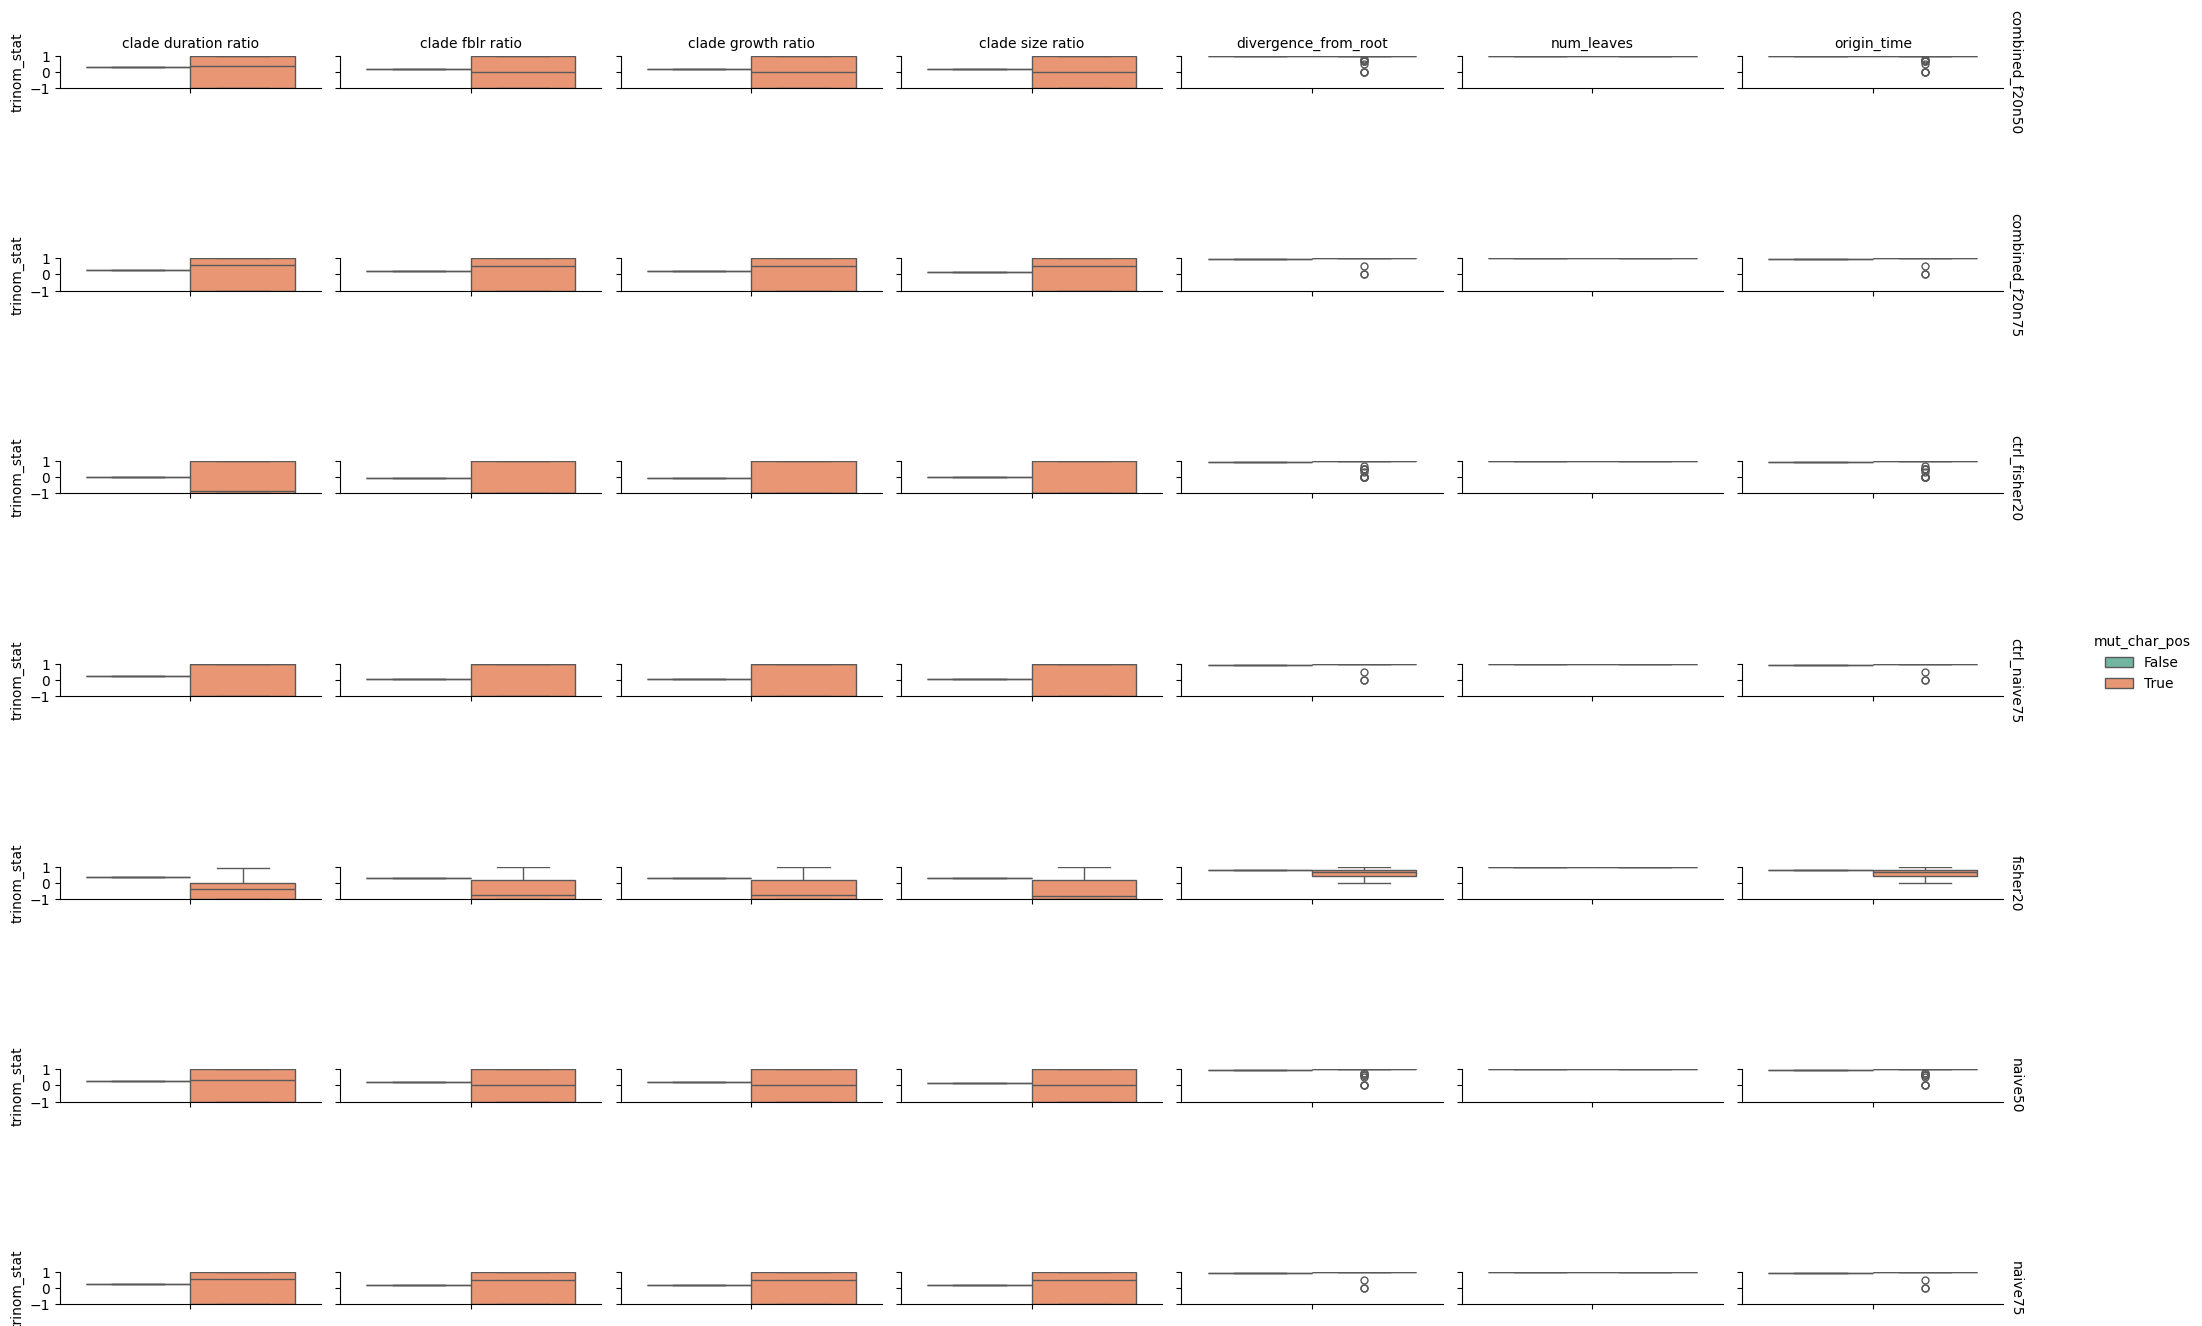

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


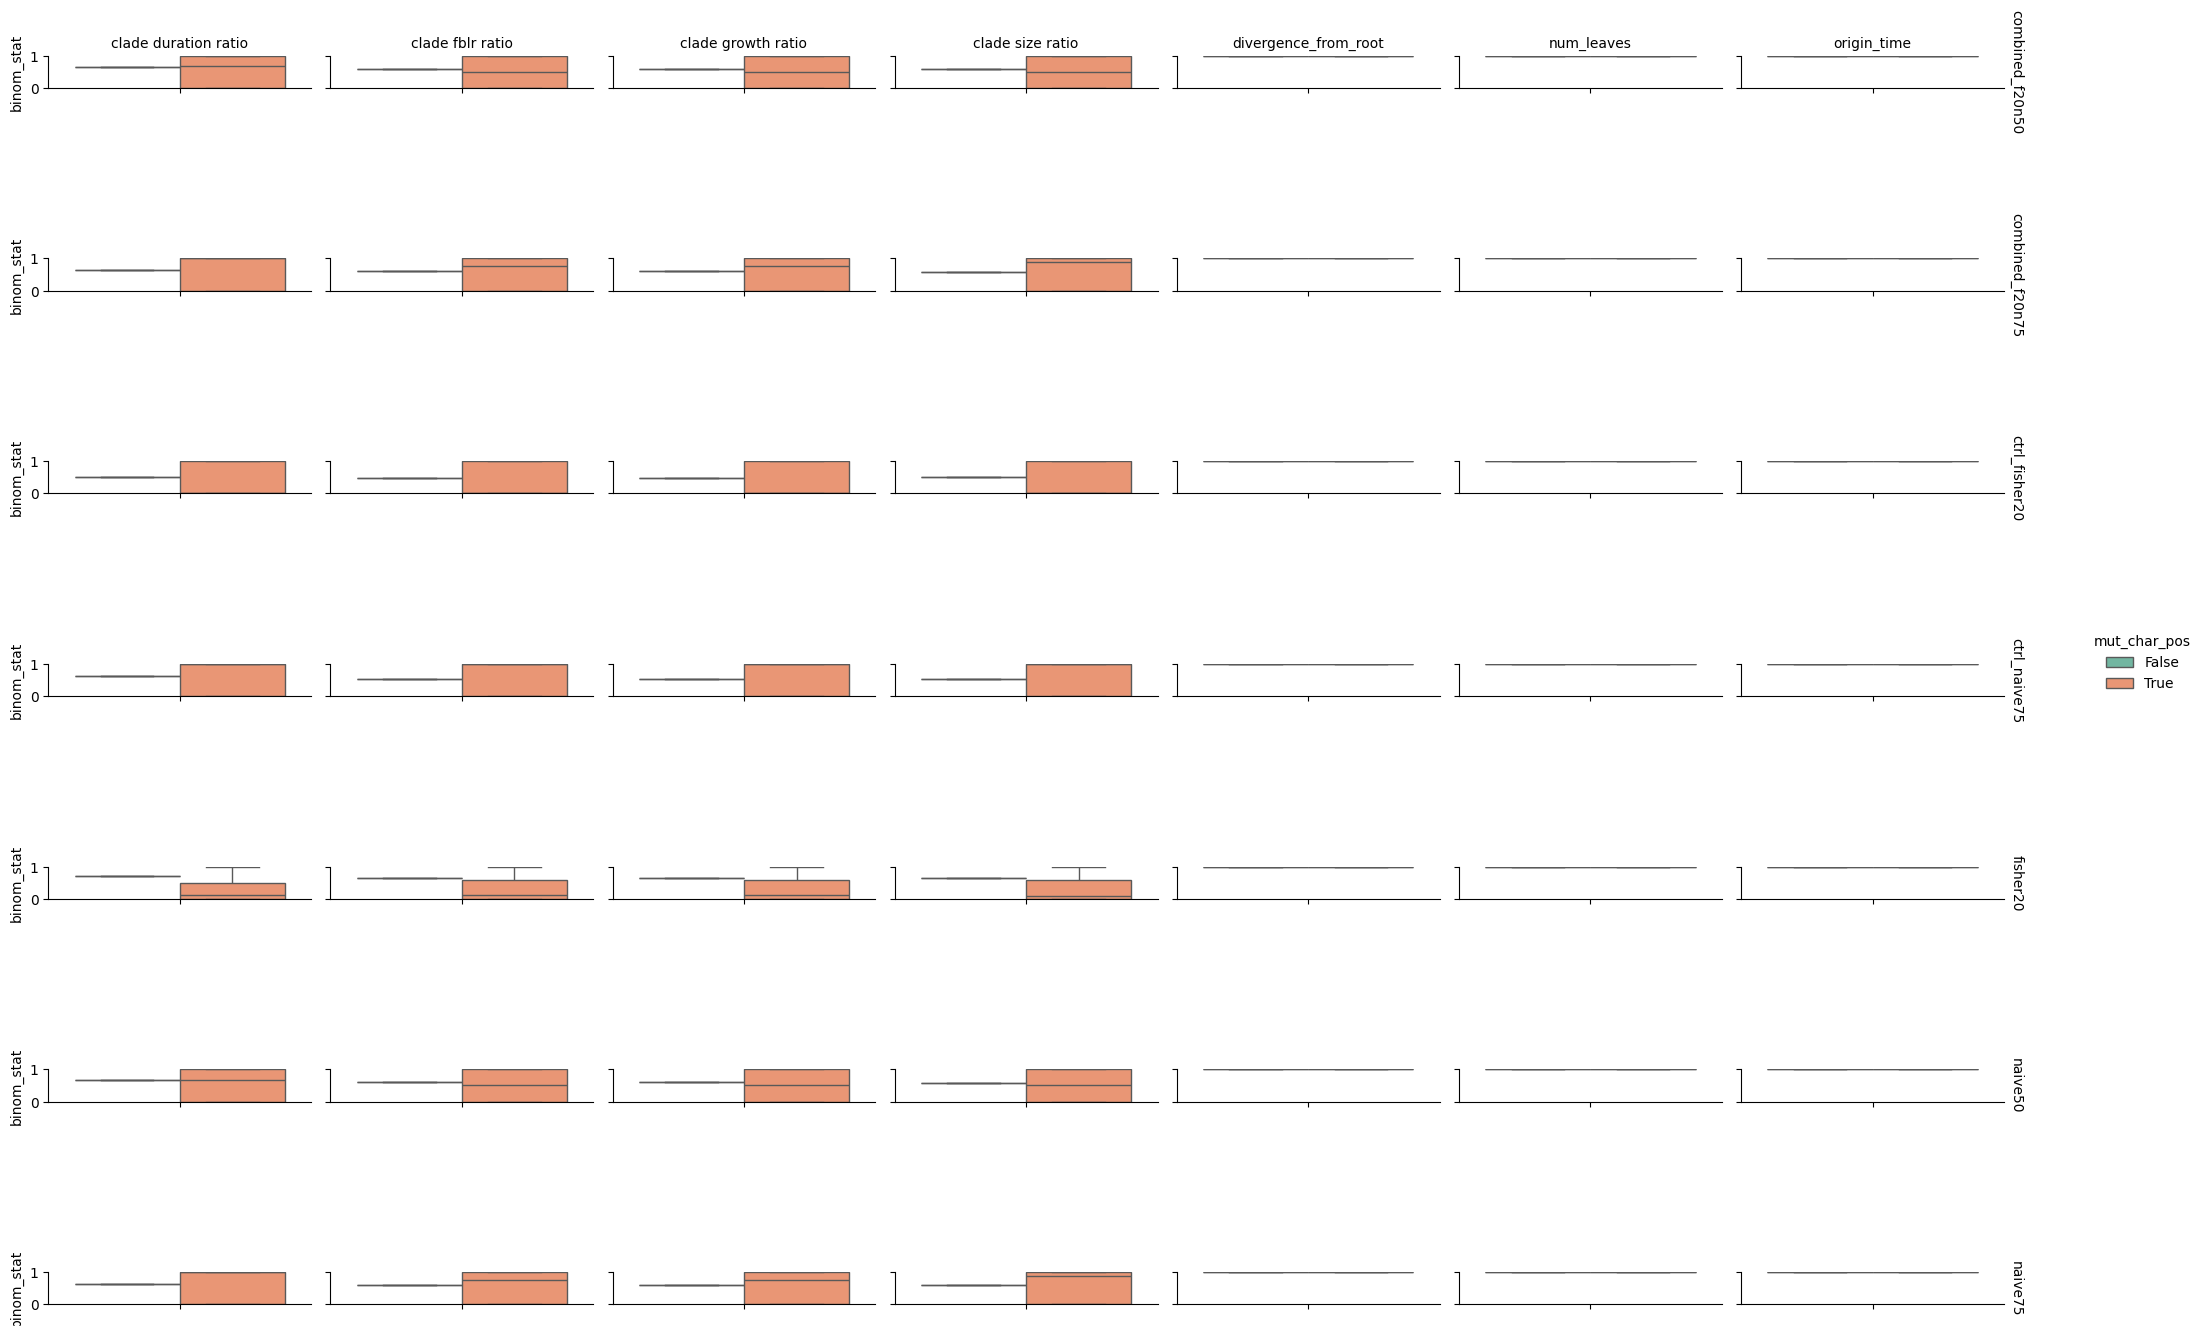

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


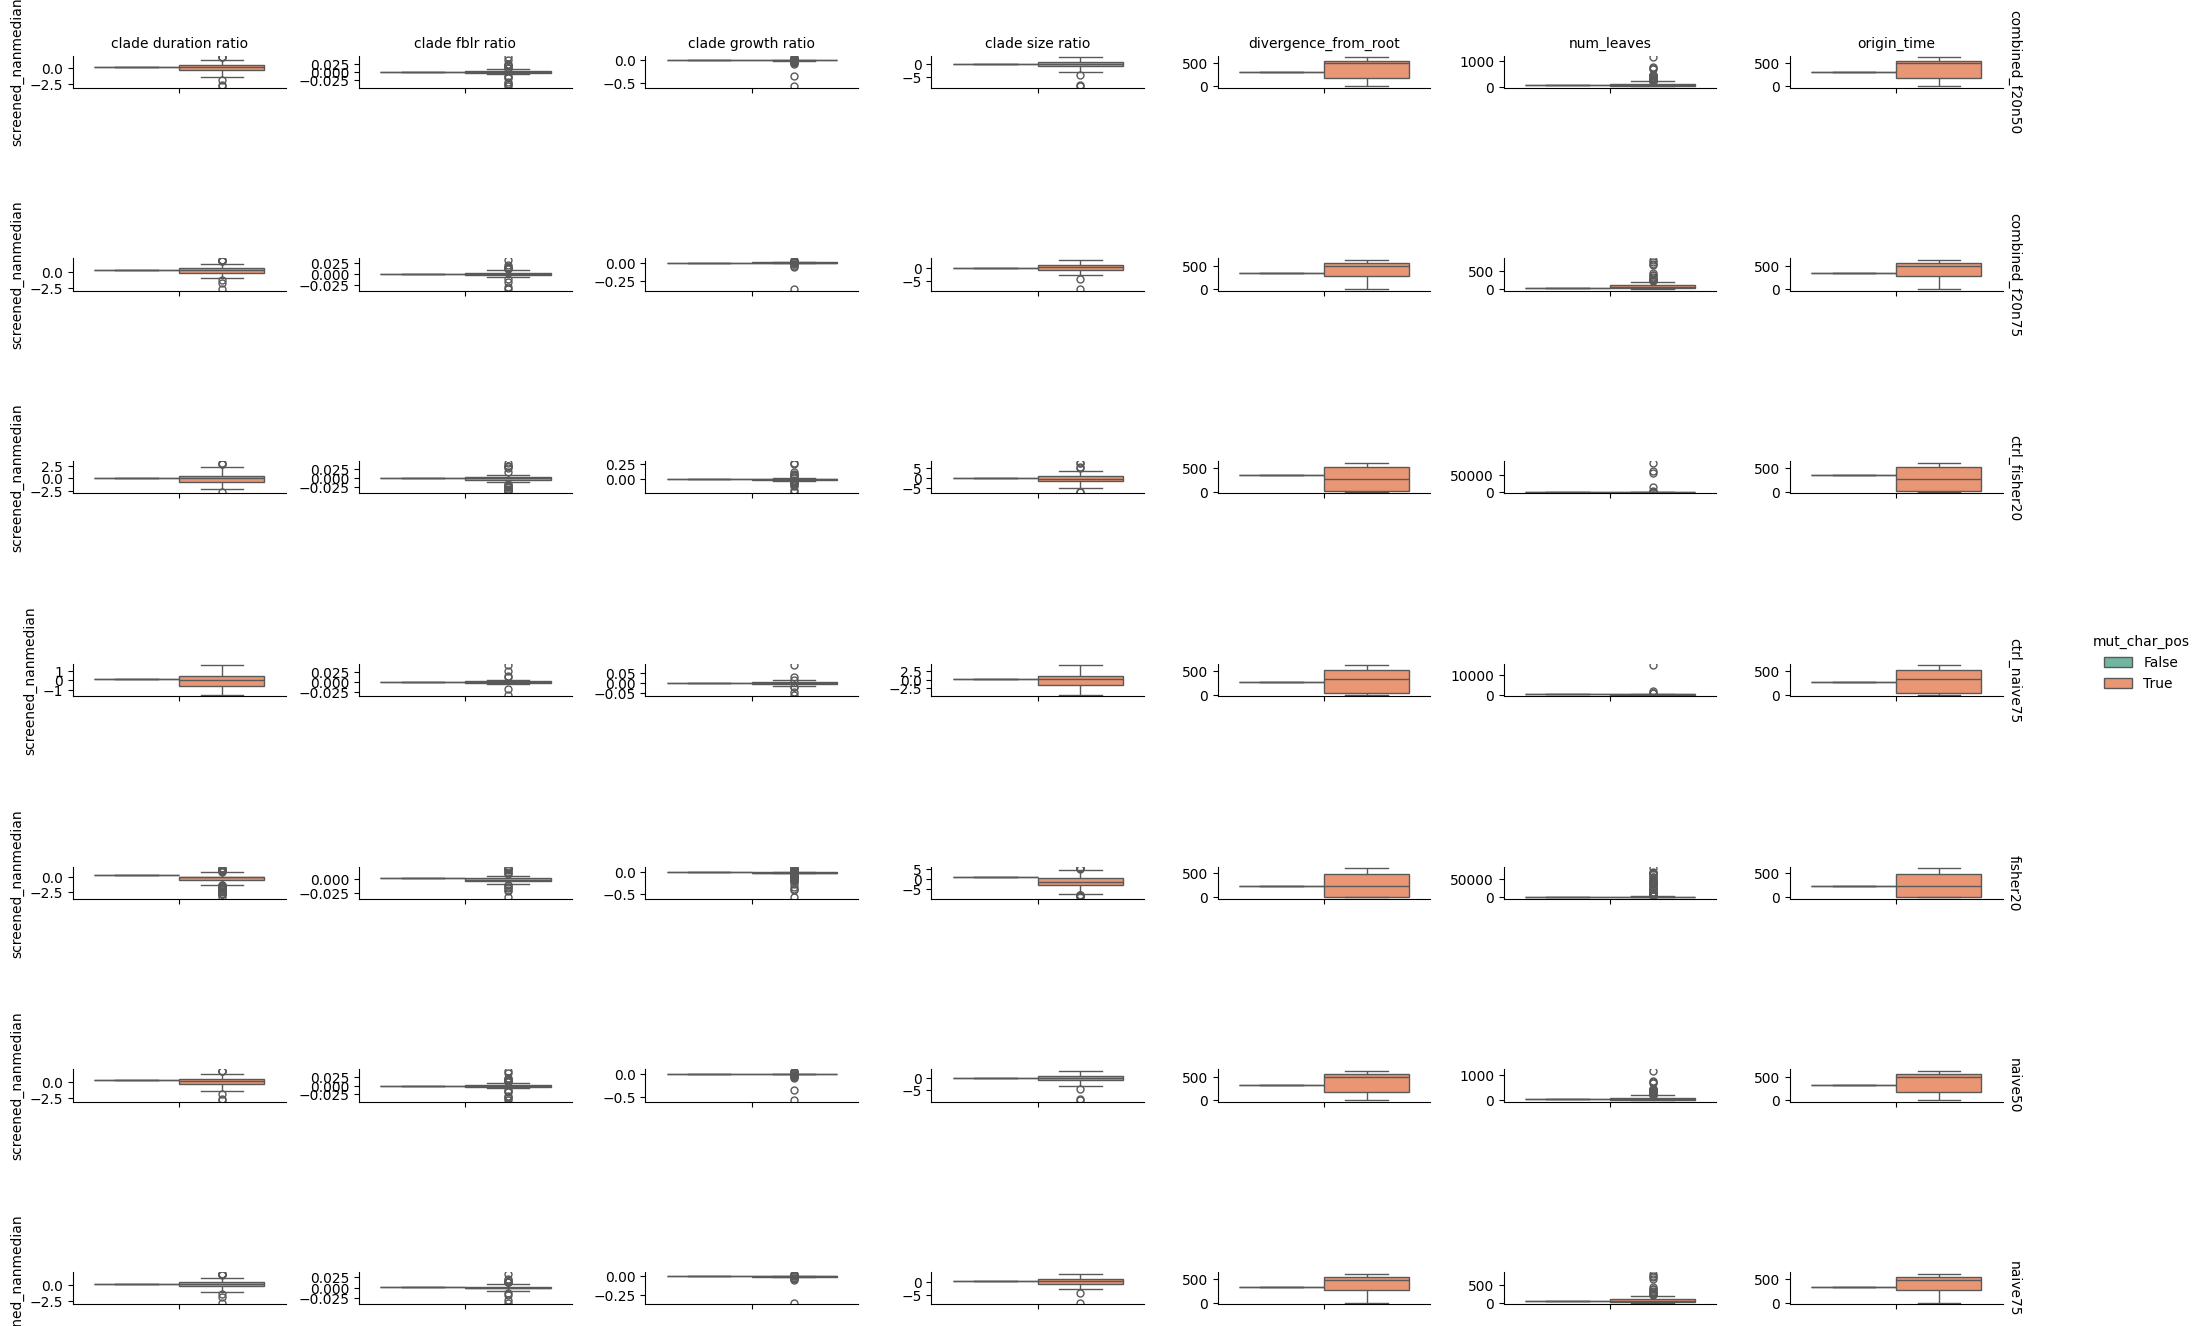

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


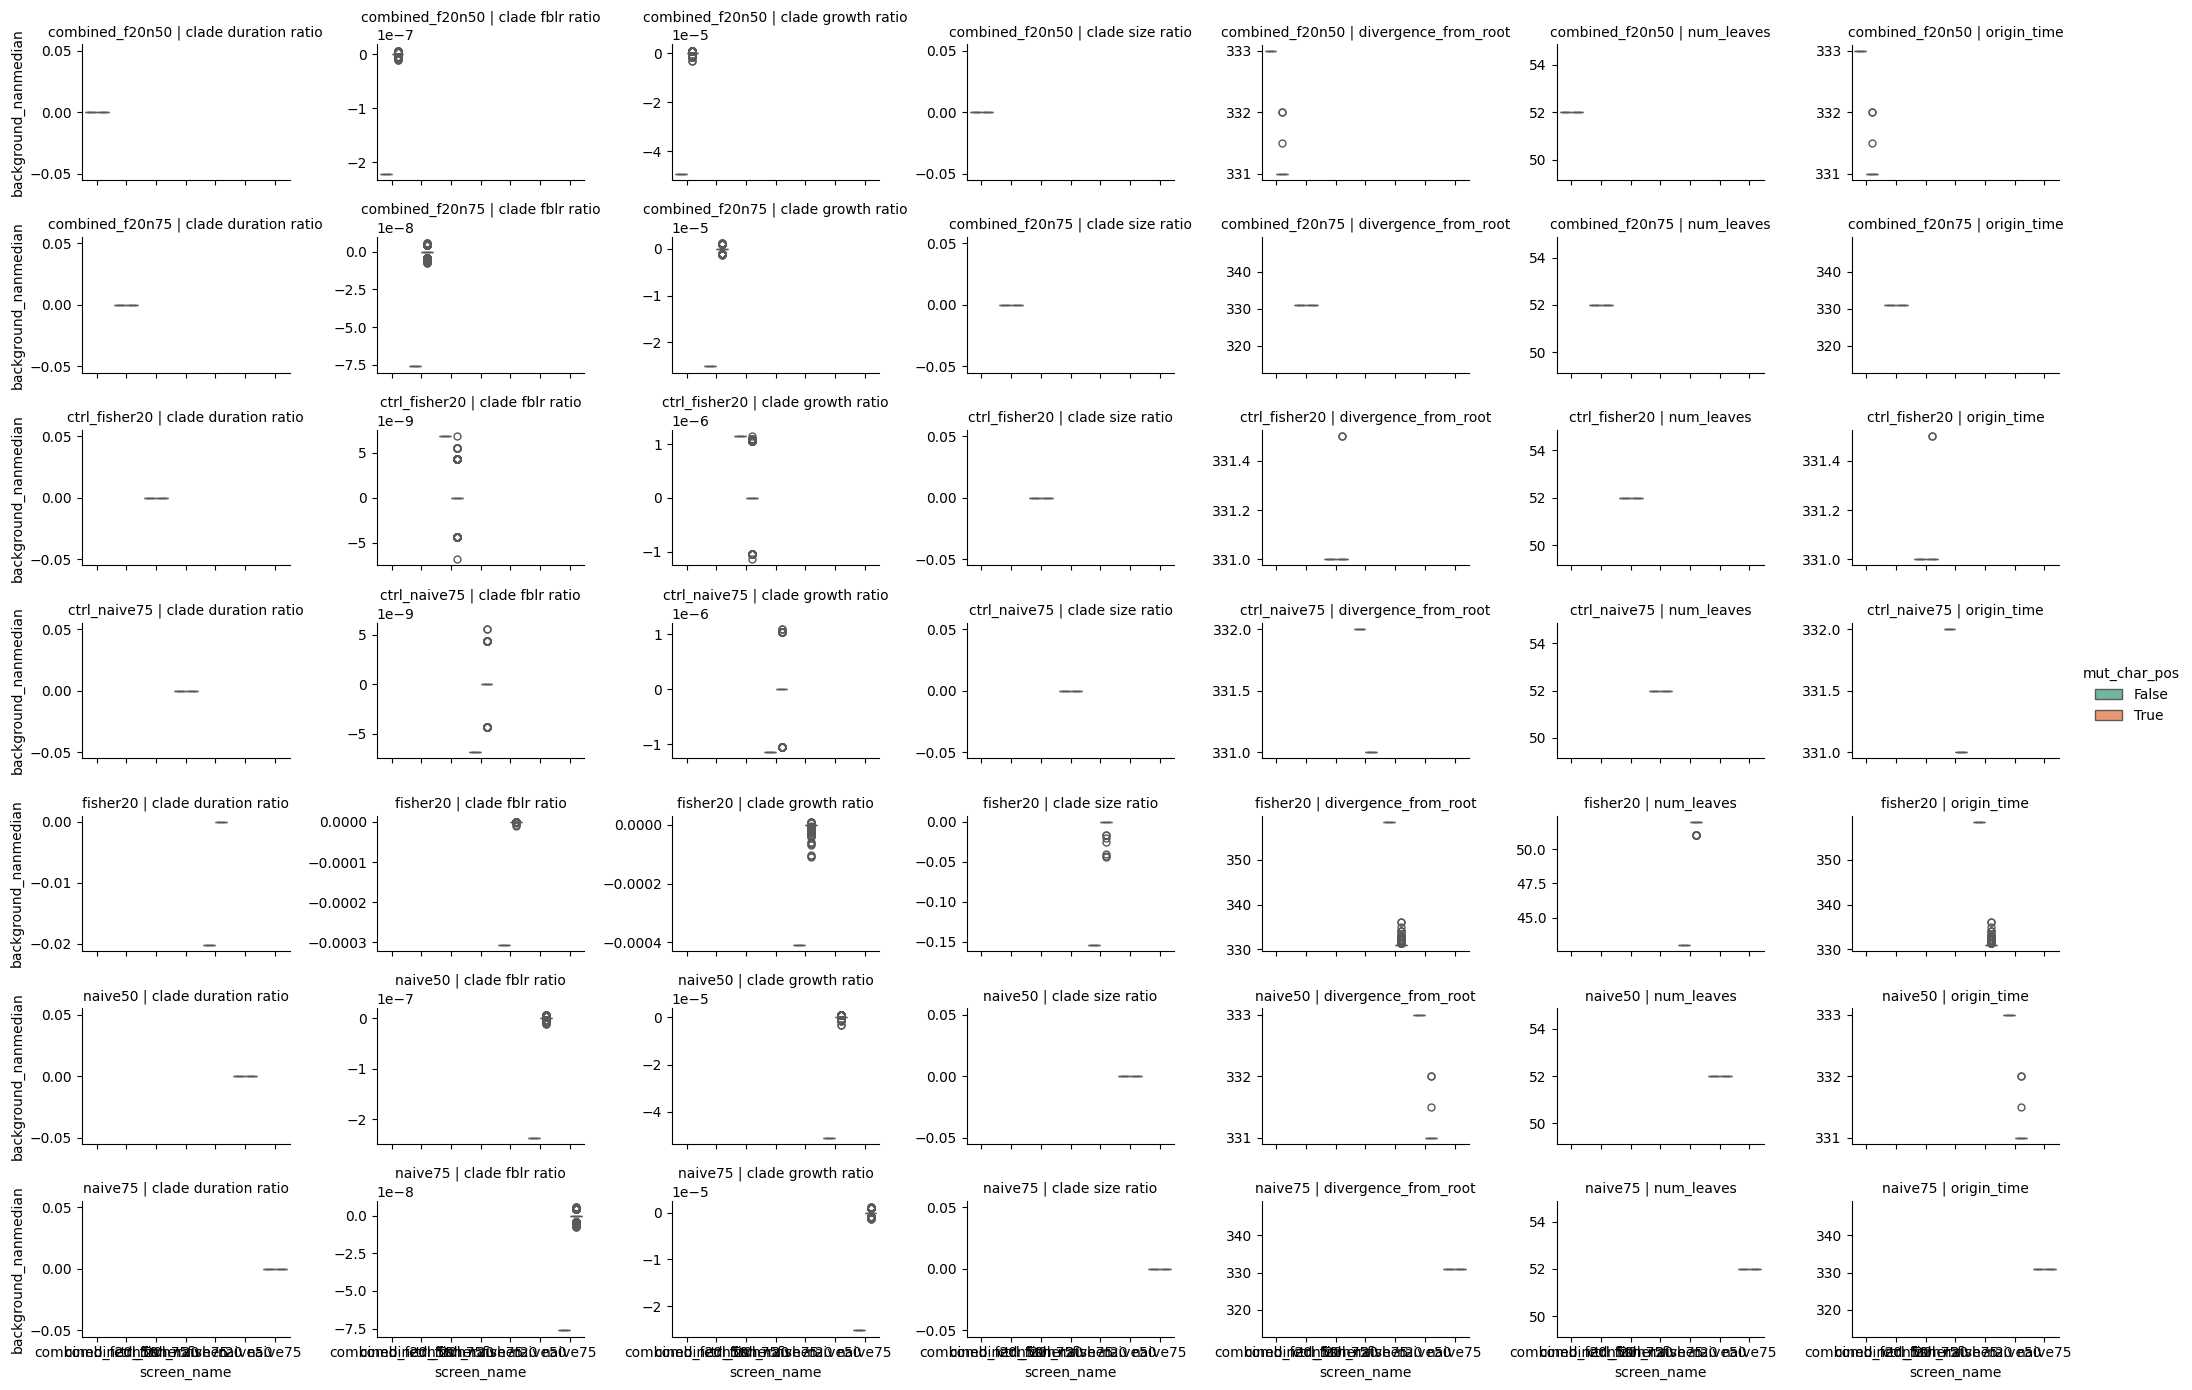

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
